# Handwritten Hindi Consonant Classification Using Convolutional Neural Networks




## 1. Mount Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [4]:
!unzip /content/drive/MyDrive/dataset.zip -d /content/drive/MyDrive/

Streaming output truncated to the last 5000 lines.
  inflating: /content/drive/MyDrive/dataset/train/character_7_chha/15605.png  
  inflating: /content/drive/MyDrive/dataset/train/character_7_chha/15606.png  
  inflating: /content/drive/MyDrive/dataset/train/character_7_chha/15607.png  
  inflating: /content/drive/MyDrive/dataset/train/character_7_chha/15608.png  
  inflating: /content/drive/MyDrive/dataset/train/character_7_chha/15609.png  
  inflating: /content/drive/MyDrive/dataset/train/character_7_chha/15610.png  
  inflating: /content/drive/MyDrive/dataset/train/character_7_chha/15611.png  
  inflating: /content/drive/MyDrive/dataset/train/character_7_chha/15612.png  
  inflating: /content/drive/MyDrive/dataset/train/character_7_chha/15614.png  
  inflating: /content/drive/MyDrive/dataset/train/character_7_chha/15615.png  
  inflating: /content/drive/MyDrive/dataset/train/character_7_chha/15616.png  
  inflating: /content/drive/MyDrive/dataset/train/character_7_chha/15617.png  
 

## 2. Data Loading Pipeline

In [8]:
import tensorflow as tf

BATCH_SIZE = 64
IMG_SIZE = (32, 32)

train_ds = tf.keras.utils.image_dataset_from_directory(
    "/content/drive/MyDrive/dataset/train",
    image_size=IMG_SIZE,
    color_mode="grayscale",
    batch_size=BATCH_SIZE,
    validation_split=0.2,
    subset="training",
    seed=42
)


Found 61200 files belonging to 36 classes.
Using 48960 files for training.


In [9]:
val_ds = tf.keras.utils.image_dataset_from_directory(
    "/content/drive/MyDrive/dataset/train",
    image_size=IMG_SIZE,
    color_mode="grayscale",
    batch_size=BATCH_SIZE,
    validation_split=0.2,
    subset="validation",
    seed=42
)


Found 61200 files belonging to 36 classes.
Using 12240 files for validation.


## 3. Test Dataset

In [25]:
test_ds = tf.keras.utils.image_dataset_from_directory(
    "/content/drive/MyDrive/dataset/test",
    image_size=(32, 32),
    color_mode="grayscale",
    batch_size=64,
    shuffle=False
)


Found 10800 files belonging to 36 classes.


## 4. Data Inspection

In [10]:
for images, labels in train_ds.take(1):
    print("Images shape:", images.shape)
    print("Labels shape:", labels.shape)
    print("Image dtype:", images.dtype)
    print("Label dtype:", labels.dtype)


Images shape: (64, 32, 32, 1)
Labels shape: (64,)
Image dtype: <dtype: 'float32'>
Label dtype: <dtype: 'int32'>


In [11]:
normalization_layer = tf.keras.layers.Rescaling(1./255)

# Test it on one batch
for images, labels in train_ds.take(1):
    normalized_images = normalization_layer(images)
    print("Min pixel value:", tf.reduce_min(normalized_images).numpy())
    print("Max pixel value:", tf.reduce_max(normalized_images).numpy())


Min pixel value: 0.0
Max pixel value: 1.0


## 5. Model Architecture

In [12]:
model = tf.keras.Sequential([

    #  Normalize pixels inside the model
    tf.keras.layers.Rescaling(1./255, input_shape=(32, 32, 1)),

    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(),

    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(),

    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(),

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(128, activation='relu'),

    # Dropout to prevent overfitting
    tf.keras.layers.Dropout(0.5),

    tf.keras.layers.Dense(36, activation='softmax')
])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


## 6. Model Compilation

In [13]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


## 7. Model Training

In [14]:
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=5
)


Epoch 1/5
765/765 ━━━━━━━━━━━━━━━━━━━━ 171s 214ms/step - accuracy: 0.3915 - loss: 2.1542 - val_accuracy: 0.9104 - val_loss: 0.3116
Epoch 2/5
765/765 ━━━━━━━━━━━━━━━━━━━━ 162s 212ms/step - accuracy: 0.8431 - loss: 0.4998 - val_accuracy: 0.9382 - val_loss: 0.2034
Epoch 3/5
765/765 ━━━━━━━━━━━━━━━━━━━━ 163s 213ms/step - accuracy: 0.9031 - loss: 0.3187 - val_accuracy: 0.9650 - val_loss: 0.1216
Epoch 4/5
765/765 ━━━━━━━━━━━━━━━━━━━━ 163s 213ms/step - accuracy: 0.9281 - loss: 0.2295 - val_accuracy: 0.9679 - val_loss: 0.1084
Epoch 5/5
765/765 ━━━━━━━━━━━━━━━━━━━━ 162s 212ms/step - accuracy: 0.9440 - loss: 0.1820 - val_accuracy: 0.9707 - val_loss: 0.0948


In [15]:
early_stop = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)

history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=20,
    callbacks=[early_stop]
)


Epoch 1/20
765/765 ━━━━━━━━━━━━━━━━━━━━ 162s 211ms/step - accuracy: 0.9530 - loss: 0.1490 - val_accuracy: 0.9743 - val_loss: 0.0810
Epoch 2/20
765/765 ━━━━━━━━━━━━━━━━━━━━ 160s 209ms/step - accuracy: 0.9598 - loss: 0.1288 - val_accuracy: 0.9766 - val_loss: 0.0764
Epoch 3/20
765/765 ━━━━━━━━━━━━━━━━━━━━ 159s 208ms/step - accuracy: 0.9640 - loss: 0.1105 - val_accuracy: 0.9775 - val_loss: 0.0753
Epoch 4/20
765/765 ━━━━━━━━━━━━━━━━━━━━ 159s 207ms/step - accuracy: 0.9705 - loss: 0.0910 - val_accuracy: 0.9766 - val_loss: 0.0754
Epoch 5/20
765/765 ━━━━━━━━━━━━━━━━━━━━ 158s 206ms/step - accuracy: 0.9738 - loss: 0.0852 - val_accuracy: 0.9757 - val_loss: 0.0851
Epoch 6/20
765/765 ━━━━━━━━━━━━━━━━━━━━ 157s 205ms/step - accuracy: 0.9722 - loss: 0.0857 - val_accuracy: 0.9801 - val_loss: 0.0742
Epoch 7/20
765/765 ━━━━━━━━━━━━━━━━━━━━ 157s 206ms/step - accuracy: 0.9760 - loss: 0.0728 - val_accuracy: 0.9797 - val_loss: 0.0738
Epoch 8/20
765/765 ━━━━━━━━━━━━━━━━━━━━ 159s 208ms/step - accuracy: 0.9793 -

## 8. Model Evaluation

In [18]:
test_loss, test_acc = model.evaluate(test_ds)
print("Test accuracy:", test_acc)


169/169 ━━━━━━━━━━━━━━━━━━━━ 28s 161ms/step - accuracy: 0.9808 - loss: 0.0743
Test accuracy: 0.9804629683494568


## 9. Confusion Matrix and Classification Report

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
2/2 ━━━━━━

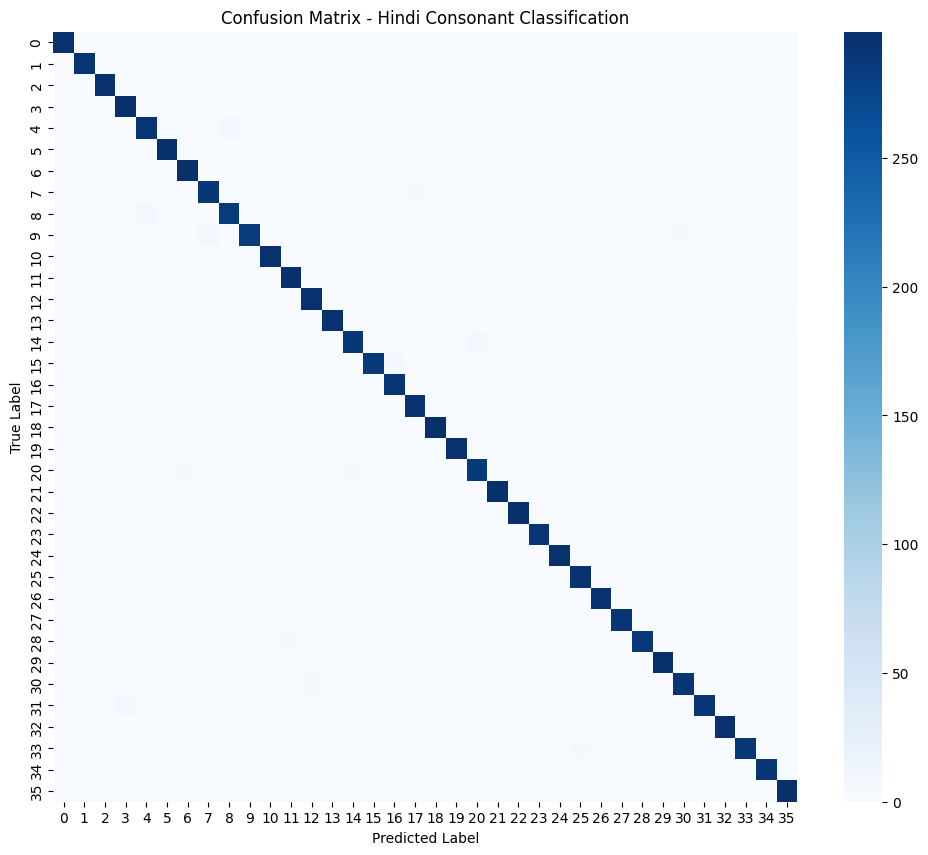

In [19]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Get true labels and predictions
y_true = []
y_pred = []

for images, labels in test_ds:
    preds = model.predict(images)
    y_pred.extend(np.argmax(preds, axis=1))
    y_true.extend(labels.numpy())

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(12, 10))
sns.heatmap(cm, cmap="Blues", cbar=True)
plt.title("Confusion Matrix - Hindi Consonant Classification")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


In [20]:
print(classification_report(y_true, y_pred))


              precision    recall  f1-score   support

           0       0.99      0.99      0.99       300
           1       0.99      0.97      0.98       300
           2       0.99      0.99      0.99       300
           3       0.96      0.99      0.98       300
           4       0.97      0.97      0.97       300
           5       1.00      1.00      1.00       300
           6       0.96      0.99      0.98       300
           7       0.96      0.97      0.96       300
           8       0.95      0.95      0.95       300
           9       0.98      0.95      0.97       300
          10       1.00      0.99      0.99       300
          11       0.96      0.99      0.98       300
          12       0.96      0.99      0.98       300
          13       1.00      0.99      0.99       300
          14       0.95      0.97      0.96       300
          15       0.99      0.96      0.97       300
          16       0.97      0.98      0.97       300
          17       0.97    

In [21]:
model.save("/content/drive/MyDrive/hindi_consonant_cnn.keras")


In [22]:
class_names = test_ds.class_names
print(class_names)


['character_10_yna', 'character_11_taamatar', 'character_12_thaa', 'character_13_daa', 'character_14_dhaa', 'character_15_adna', 'character_16_tabala', 'character_17_tha', 'character_18_da', 'character_19_dha', 'character_1_ka', 'character_20_na', 'character_21_pa', 'character_22_pha', 'character_23_ba', 'character_24_bha', 'character_25_ma', 'character_26_yaw', 'character_27_ra', 'character_28_la', 'character_29_waw', 'character_2_kha', 'character_30_motosaw', 'character_31_petchiryakha', 'character_32_patalosaw', 'character_33_ha', 'character_34_chhya', 'character_35_tra', 'character_36_gya', 'character_3_ga', 'character_4_gha', 'character_5_kna', 'character_6_cha', 'character_7_chha', 'character_8_ja', 'character_9_jha']


## 9. Sample Prediction Visualization

In [23]:
import matplotlib.pyplot as plt
import numpy as np

# Take one batch from test data
for images, labels in test_ds.take(1):
    image = images[0]          # first image
    true_label = labels[0]     # true label

    # Add batch dimension and predict
    prediction = model.predict(tf.expand_dims(image, axis=0))
    predicted_label = np.argmax(prediction)

    break


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 851ms/step


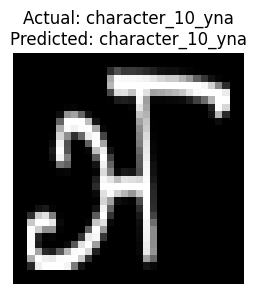

In [24]:
plt.figure(figsize=(3, 3))
plt.imshow(image.numpy().squeeze(), cmap="gray")
plt.axis("off")

plt.title(
    f"Actual: {class_names[true_label]}\nPredicted: {class_names[predicted_label]}"
)
plt.show()


##  10. Conclusion

The CNN achieved ~98% test accuracy, demonstrating strong performance and generalization for handwritten Hindi consonant classification.